# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset from Keras.datasets

In [4]:
from tensorflow.keras.datasets import fashion_mnist

# Splitting Dataset

Dataset splitting is an important step in machine learning and data analysis. It involves dividing a dataset into two or more subsets to train and evaluate a model effectively. The most common type of dataset splitting is into training and testing subsets.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [7]:
x_train.max()

255

In [8]:
x_train = x_train/255

In [9]:
x_test = x_test/255

In [10]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

# Reshaping

Reshaping data is a common operation in machine learning when you need to adjust the dimensions or structure of your data to meet the requirements of a particular algorithm or model.

In [11]:
x_train = x_train.reshape(60000,28,28,1)

In [12]:
x_test = x_test.reshape(10000,28,28,1)

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Converting to Categorical

Converting data to categorical format is often necessary for certain machine learning tasks, especially when dealing with categorical or nominal variables. This conversion is typically performed to represent the categorical variables as numeric values that can be processed by machine learning algorithms.

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Summary

A model summary provides a concise overview of the architecture and parameters of a machine learning model. It typically includes information about the layers in the model, the number of parameters in each layer, and the total number of trainable parameters in the model.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance

In [19]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 58s 29ms/step - loss: 0.4061 - accuracy: 0.8545
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2795 - accuracy: 0.9003
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2403 - accuracy: 0.9135
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2165 - accuracy: 0.9225
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1975 - accuracy: 0.9301
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1837 - accuracy: 0.9348
Epoch 7/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1753 - accuracy: 0.9377
Epoch 8/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1641 - accuracy: 0.9419
Epoch 9/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1568 - accuracy: 0.9450
Epoch 10/10
1875/1875 [==============================] - 54s 29m

In [21]:
model.save('model_mnist_fashion.h5')

# Learning Curve

A learning curve is a graphical representation of the performance of a machine learning model on a training dataset and a validation dataset as a function of the training iterations or the amount of training data. It helps visualize how the model's performance improves or plateaus over time as it learns from the data.

In [20]:
loss = pd.DataFrame(model.history.history)

In [22]:
loss.head()

,loss,accuracy
0,0.406099,0.854483
1,0.279500,0.900300
2,0.240256,0.913467
3,0.216533,0.922500
4,0.197526,0.930050


<AxesSubplot:>

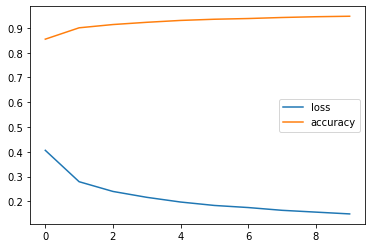

In [23]:
loss.plot()

# Predictiong On x-Test

In [24]:
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 7ms/step


In [25]:
predict_class = y_pred.argmax(axis = 1)

In [26]:
predict_class

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [27]:
print(y_test[9]), print(predict_class[9])

7
7


(None, None)

# Error Analysis 

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during predictions to gain insights into the patterns, sources, and potential improvements.

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy Score

To compute the accuracy score of your model's predictions on the x_test dataset, we need access to the true labels or targets associated with the x_test samples. Since we have the true labels available as y_test, we can use the scikit-learn library's accuracy_score() function to calculate the accuracy.

In [29]:
accuracy_score = accuracy_score(y_test, predict_class)

In [30]:
accuracy_score

0.9002

# Classification Report

To generate a classification report for evaluating the performance of a classification model on the x_test dataset, we need access to the true labels or targets associated with the samples. Since we have the true labels available as y_test, we can use the scikit-learn library's classification_report() function to generate the report.

In [31]:
print(classification_report(y_test, predict_class))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.80      0.83      1000
           3       0.88      0.95      0.91      1000
           4       0.78      0.90      0.84      1000
           5       0.98      0.96      0.97      1000
           6       0.82      0.61      0.70      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Confusion Matrix

To generate a confusion matrix for evaluating the performance of a classification model on the x_test dataset, we need access to the true labels or targets associated with the samples. Since we have the true labels available as y_test, we can use the scikit-learn library's confusion_matrix() function to generate the matrix.

In [32]:
confusion_matrix = confusion_matrix(y_test, predict_class)

In [33]:
confusion_matrix

array([[887,   2,  15,  27,   6,   0,  56,   0,   7,   0],
       [  2, 976,   0,  17,   1,   0,   1,   0,   3,   0],
       [ 27,   0, 801,  13, 114,   0,  43,   0,   2,   0],
       [ 14,   4,   6, 949,  20,   0,   7,   0,   0,   0],
       [  1,   1,  31,  36, 902,   0,  27,   0,   2,   0],
       [  0,   0,   0,   1,   0, 962,   0,  22,   0,  15],
       [168,   0,  63,  36, 108,   0, 615,   0,  10,   0],
       [  0,   0,   0,   0,   0,   9,   0, 979,   1,  11],
       [  4,   0,   3,   2,   1,   3,   3,   2, 981,   1],
       [  0,   0,   0,   0,   0,   4,   1,  45,   0, 950]], dtype=int64)

<AxesSubplot:>

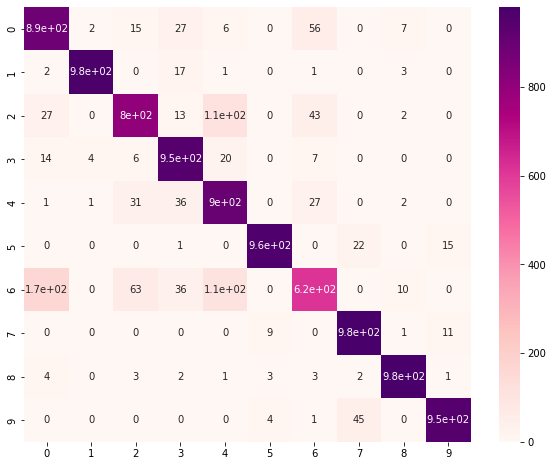

In [35]:
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_matrix, 
            annot =  True, 
            cmap = 'RdPu')

# Thanks !